# Problem Statement

You have been hired as a consultant to a start-up that is running targetted marketing ads on Facebook. The company wants to analyze customer behaviour by predicting which customers will click on the advertisement. Customer data is as follows:


Inputs:

 - Name
 - E-mail
 - Country
 - Time on Facebook
 - Estimated Salary (derived from other parameters)


Outputs:

 - Click - (1: customer clicked on Ad, 0: customer did not click on Ad)

## Step #0: Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

## Step #1: Import Data

In [2]:
df = pd.read_csv('Data\Facebook_Ads_2.csv', encoding='ISO-8859-1')
df.head()

,Names,emails,Country,Time Spent on Site,Salary,Clicked
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,25.649648,55330.06006,0
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,32.456107,79049.07674,1
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,20.945978,41098.60826,0
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,54.039325,37143.35536,1
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,34.249729,37355.11276,0


## Step #2: Explore and Visualize Data

In [3]:
# For convenience
df['Time'] = df['Time Spent on Site']
df.drop('Time Spent on Site', axis=1, inplace=True)

In [4]:
df.head()

,Names,emails,Country,Salary,Clicked,Time
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,55330.06006,0,25.649648
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,79049.07674,1,32.456107
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,41098.60826,0,20.945978
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,37143.35536,1,54.039325
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,37355.11276,0,34.249729


In [5]:
print("Number of records = ", len(df))
print("Number of clicked = ", len(df[df.Clicked == 1]))
print("Number of not clicked = ", len(df[df.Clicked == 0]))
print("% of clicked = ", round(len(df[df.Clicked == 1]) / len(df) * 100.,2))
print("% of not clicked = ", round(100 - len(df[df.Clicked == 1]) / len(df) * 100.,2))

Number of records =  499
Number of clicked =  250
Number of not clicked =  249
% of clicked =  50.1
% of not clicked =  49.9


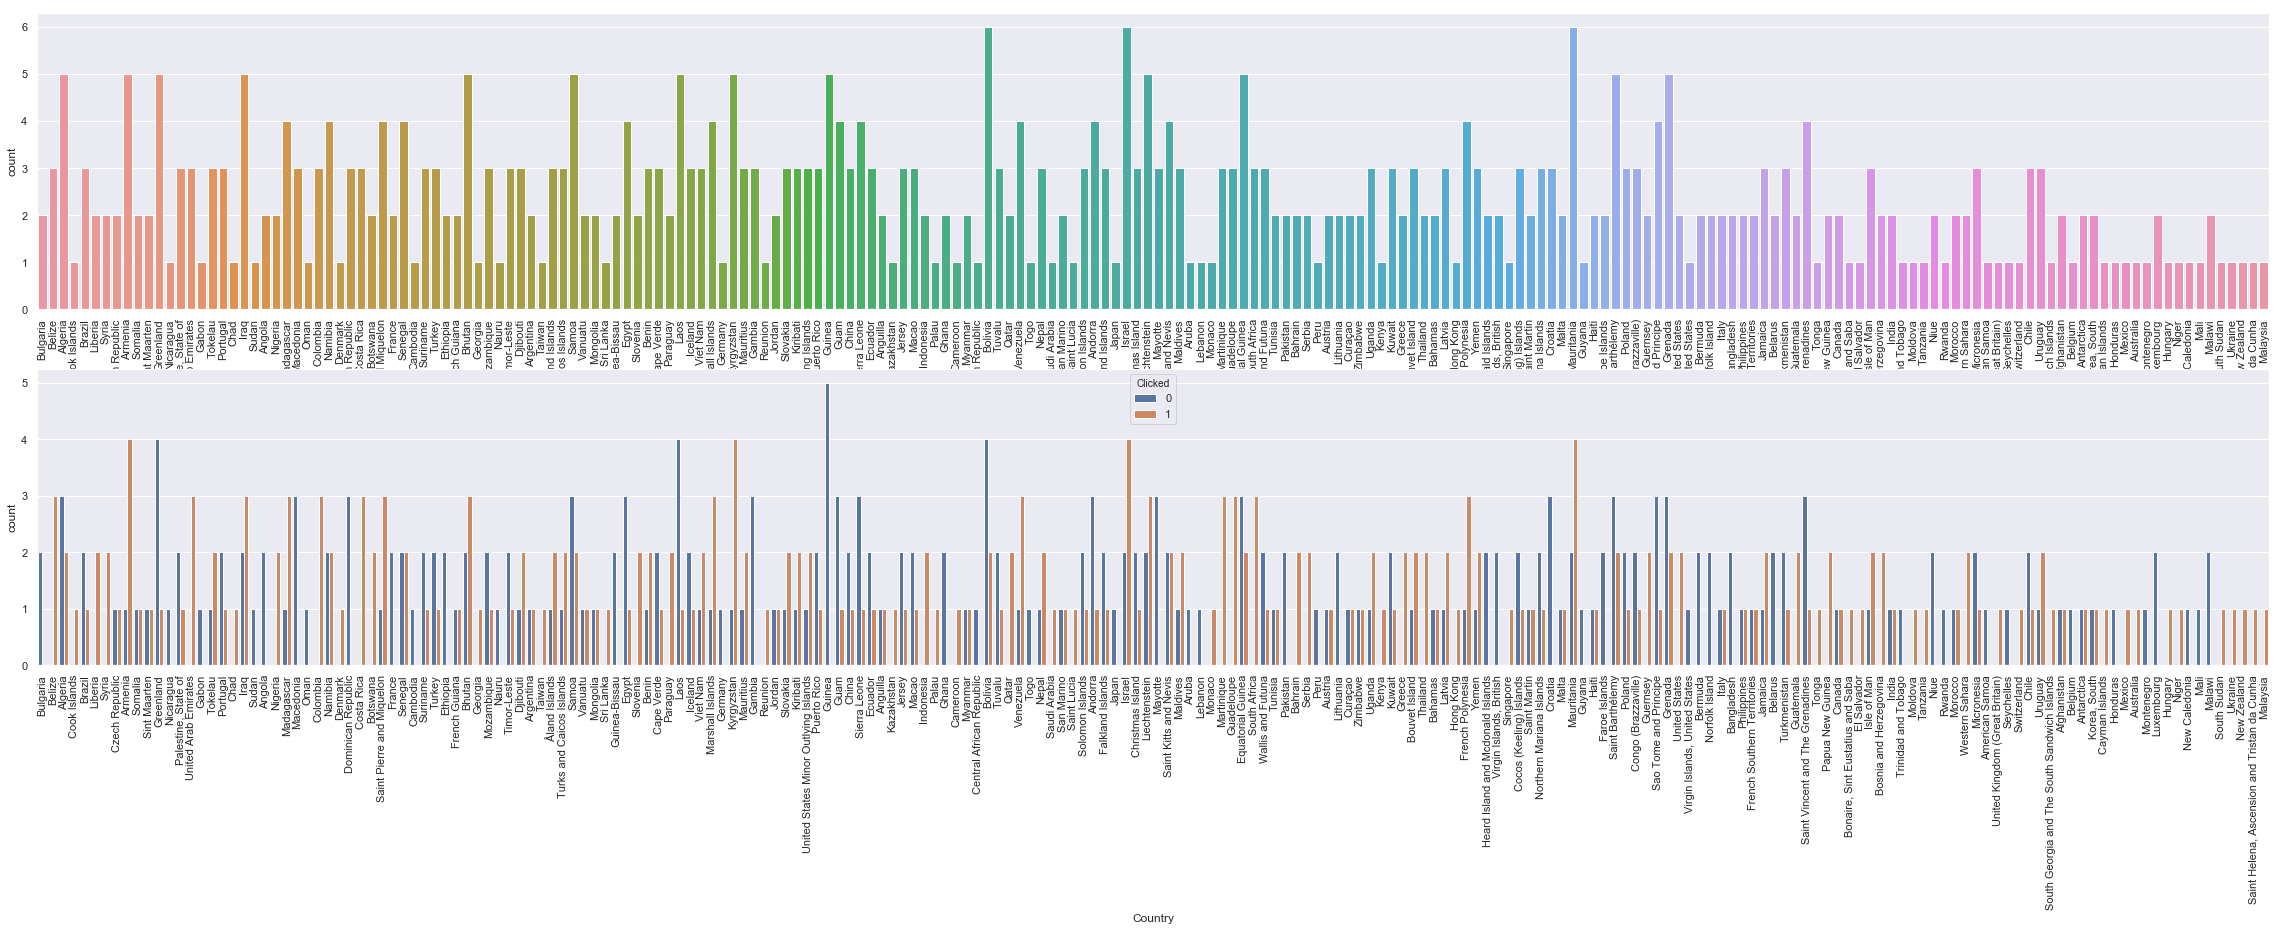

In [6]:
plt.figure(figsize=[40, 12])
plt.subplot(211)
sns.countplot(x = 'Country', data = df);
plt.xticks(rotation=90);
plt.subplot(212)
sns.countplot(x = 'Country', data = df, hue='Clicked');
plt.xticks(rotation=90);

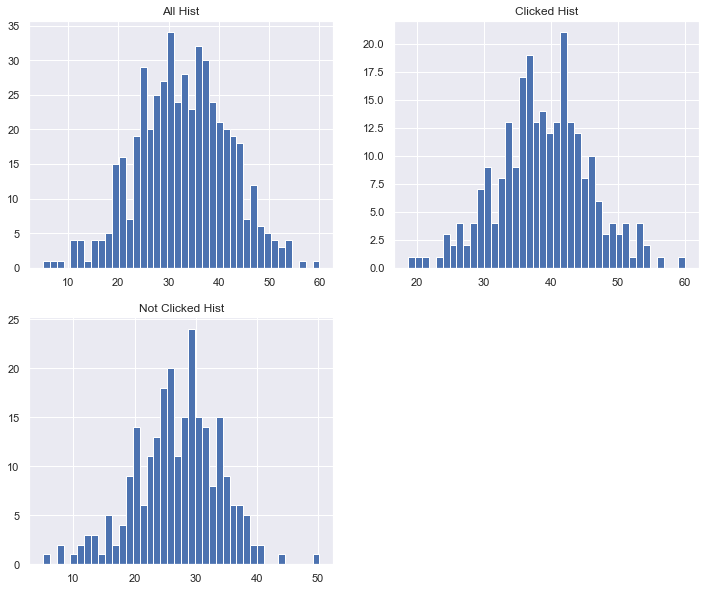

In [7]:
plt.figure(figsize=(12,10))
plt.subplot(221)
df.Time.hist(bins=40);
plt.title("All Hist")
plt.subplot(222)
df.Time[df['Clicked'] == 1].hist(bins=40);
plt.title("Clicked Hist");
plt.subplot(223)
df.Time[df['Clicked'] == 0].hist(bins=40);
plt.title("Not Clicked Hist");

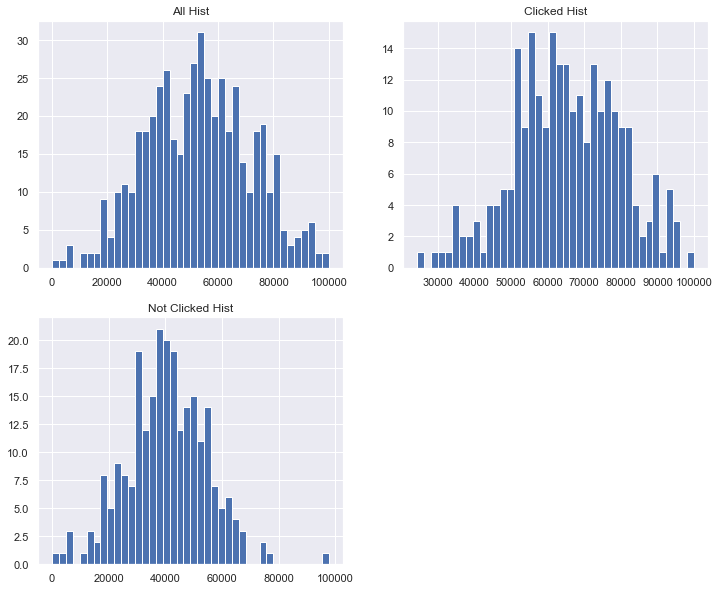

In [8]:
plt.figure(figsize=(12,10))
plt.subplot(221)
df.Salary.hist(bins=40);
plt.title("All Hist")
plt.subplot(222)
df.Salary[df['Clicked'] == 1].hist(bins=40);
plt.title("Clicked Hist");
plt.subplot(223)
df.Salary[df['Clicked'] == 0].hist(bins=40);
plt.title("Not Clicked Hist");

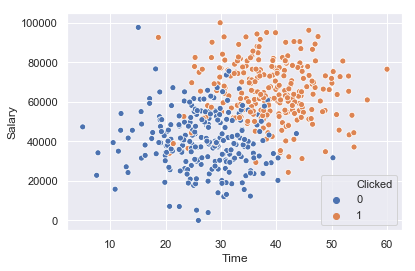

In [9]:
sns.scatterplot('Time', 'Salary', data=df, hue='Clicked');

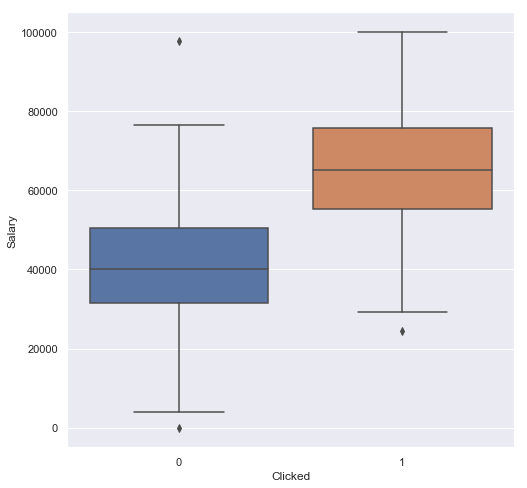

In [10]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Clicked', y='Salary', data=df);

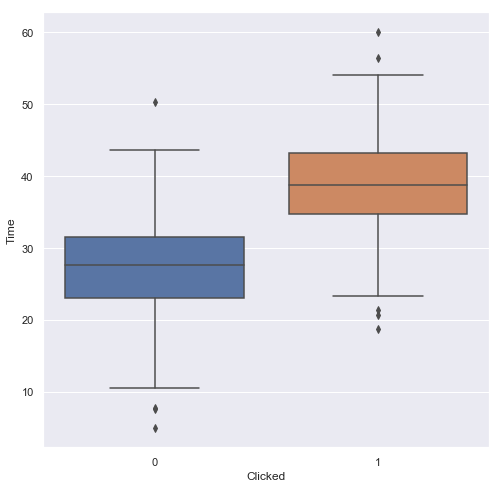

In [11]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='Clicked', y='Time', data=df);

In [12]:
df.Country.value_counts()

Israel                                          6
Bolivia                                         6
Mauritania                                      6
Armenia                                         5
Bhutan                                          5
Saint Barthélemy                                5
Guinea                                          5
Kyrgyzstan                                      5
Algeria                                         5
Samoa                                           5
Greenland                                       5
Equatorial Guinea                               5
Grenada                                         5
Laos                                            5
Iraq                                            5
Liechtenstein                                   5
Senegal                                         4
Saint Pierre and Miquelon                       4
Marshall Islands                                4
Venezuela                                       4


Looks like Country should be dropped... Too many values and not enough samples in each

## Step #3: Prepare the Data for Training / Data Cleaning

In [13]:
df.columns

Index(['Names', 'emails', 'Country', 'Salary', 'Clicked', 'Time'], dtype='object')

In [14]:
cols = ['Time', 'Salary']
X = df[cols]
X.head()

,Time,Salary
0,25.649648,55330.06006
1,32.456107,79049.07674
2,20.945978,41098.60826
3,54.039325,37143.35536
4,34.249729,37355.11276


In [15]:
y = df.Clicked.values

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=0)

**Going to test difference between scaled and unscaled values**

In [17]:
X_train_ns = X_train.values
X_test_ns = X_test.values

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_train_sc = sc_x.fit_transform(X_train.values)
X_test_sc = sc_x.transform(X_test.values)

## Step #4: Model Training

**Try both sets of X data created and run GridSearch on the better of the two to use on the test data**

In [18]:
from sklearn.linear_model import LogisticRegression
clf_ns = LogisticRegression(random_state=0)
clf_sc = LogisticRegression(random_state=0)

In [19]:
clf_ns.fit(X_train_ns, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
clf_sc.fit(X_train_sc, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
y_train_nspred = clf_ns.predict(X_train_ns)
y_train_scpred = clf_sc.predict(X_train_sc)

In [22]:
print(confusion_matrix(y_train, y_train_nspred))
print(classification_report(y_train, y_train_nspred))

[[ 21 180]
 [  4 194]]
              precision    recall  f1-score   support

           0       0.84      0.10      0.19       201
           1       0.52      0.98      0.68       198

   micro avg       0.54      0.54      0.54       399
   macro avg       0.68      0.54      0.43       399
weighted avg       0.68      0.54      0.43       399



In [23]:
print(confusion_matrix(y_train, y_train_scpred))
print(classification_report(y_train, y_train_scpred))

[[184  17]
 [ 13 185]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       201
           1       0.92      0.93      0.93       198

   micro avg       0.92      0.92      0.92       399
   macro avg       0.92      0.92      0.92       399
weighted avg       0.92      0.92      0.92       399



Clearly the scaled did far better. Run a GridSearch on it.

In [24]:
from sklearn.model_selection import GridSearchCV
params = {'C': (.1, .5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0)}

clf_sc_gs = GridSearchCV(clf_sc, params, n_jobs=-1,
                           cv=5, verbose=1, scoring='accuracy')

In [25]:
clf_sc_gs.fit(X_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   15.7s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': (0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [26]:
clf_sc_gs.best_score_

0.9172932330827067

In [27]:
clf_sc_gs.best_estimator_.get_params()

{'C': 0.1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'warn',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [28]:
y_train_gs_scpred = clf_sc_gs.predict(X_train_sc)

In [29]:
print(confusion_matrix(y_train, y_train_gs_scpred))
print(classification_report(y_train, y_train_gs_scpred))

[[184  17]
 [ 12 186]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       201
           1       0.92      0.94      0.93       198

   micro avg       0.93      0.93      0.93       399
   macro avg       0.93      0.93      0.93       399
weighted avg       0.93      0.93      0.93       399



Looks like it helped slightly on the training data. Let's look at test data.

## Step #5: Model Testing

**Unscaled**

In [30]:
y_test_nspred = clf_ns.predict(X_test_ns)

In [31]:
print(confusion_matrix(y_test, y_test_nspred))
print(classification_report(y_test, y_test_nspred))

[[ 5 43]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      0.10      0.19        48
           1       0.55      1.00      0.71        52

   micro avg       0.57      0.57      0.57       100
   macro avg       0.77      0.55      0.45       100
weighted avg       0.76      0.57      0.46       100



**Scaled**

In [32]:
y_test_scpred = clf_sc.predict(X_test_sc)

In [33]:
print(confusion_matrix(y_test, y_test_scpred))
print(classification_report(y_test, y_test_scpred))

[[43  5]
 [ 9 43]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



**Scaled with GridSearchCV**

In [34]:
y_test_gs_scpred = clf_sc_gs.predict(X_test_sc)

In [35]:
print(confusion_matrix(y_test, y_test_gs_scpred))
print(classification_report(y_test, y_test_gs_scpred))

[[43  5]
 [ 9 43]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        48
           1       0.90      0.83      0.86        52

   micro avg       0.86      0.86      0.86       100
   macro avg       0.86      0.86      0.86       100
weighted avg       0.86      0.86      0.86       100



Looks like our GridSearch yielded the same results as just the scaled data... both of which were FAR better than the unscaled.


I wrote code above, the code below is from the professor.